@Author: Bhupinder Singh

@Date: 26-12-2022

@Last Modified by: Bhupinder Singh

@Last Modified date: 26-12-2022

@Title: CNN model for Multi class classification

Downloading the dataset and uploading it on google colab

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

100% 375M/376M [00:12<00:00, 37.3MB/s]
100% 376M/376M [00:12<00:00, 31.9MB/s]


Unzip the dataset files

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/animal-image-datasetdog-cat-and-panda.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing the required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Reading the Dataset

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 

#splits data into training and testing(validation) sets
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

import matplotlib.pyplot as plt


#training data
train_generator = train_datagen.flow_from_directory(
    '/content/animals/animals',  # Source directory
    target_size=(150, 150),  # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')



#Testing data
validation_generator = train_datagen.flow_from_directory(
'/content/animals/animals',
target_size=(150, 150),
batch_size=15,
class_mode='categorical',
subset='validation') # 

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Creation of multiclass cnn model

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=13,validation_data=validation_generator)

Epoch 1/13
150/150 [==============================] - 15s 83ms/step - loss: 1.0947 - accuracy: 0.5729 - val_loss: 1.3410 - val_accuracy: 0.3133
Epoch 2/13
150/150 [==============================] - 12s 82ms/step - loss: 0.5871 - accuracy: 0.6044 - val_loss: 0.8173 - val_accuracy: 0.3587
Epoch 3/13
150/150 [==============================] - 12s 82ms/step - loss: 0.4923 - accuracy: 0.6284 - val_loss: 0.6316 - val_accuracy: 0.5360
Epoch 4/13
150/150 [==============================] - 12s 81ms/step - loss: 0.4559 - accuracy: 0.6733 - val_loss: 0.5406 - val_accuracy: 0.6373
Epoch 5/13
150/150 [==============================] - 12s 82ms/step - loss: 0.4123 - accuracy: 0.6996 - val_loss: 0.4501 - val_accuracy: 0.6747
Epoch 6/13
150/150 [==============================] - 12s 81ms/step - loss: 0.3750 - accuracy: 0.7298 - val_loss: 0.9184 - val_accuracy: 0.5507
Epoch 7/13
150/150 [==============================] - 12s 81ms/step - loss: 0.3413 - accuracy: 0.7551 - val_loss: 0.4403 - val_accuracy:

Checking model predictions with random images

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 1.]], dtype=float32)

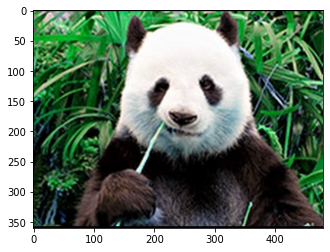

In [ ]:
import cv2

test_img = cv2.imread('/content/images/panda.jpg')

plt.imshow(test_img)

test_img = cv2.resize(test_img,(150,150))

test_input = test_img.reshape((1,150,150,3))

model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0., 1., 0.]], dtype=float32)

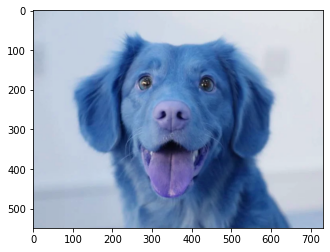

In [ ]:
import cv2

test_img = cv2.imread('/content/dog.webp')

plt.imshow(test_img)

test_img = cv2.resize(test_img,(150,150))

test_input = test_img.reshape((1,150,150,3))

model.predict(test_input)